In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
plt.style.use("seaborn")

In [98]:
raw_df = pd.read_csv("../data/Tweets.csv")

In [288]:
def define_axis_style(ax, title, x_label, y_label, legend=False):
    ax.set_title(title, fontsize=18)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_xlabel(x_label, fontsize=16)
    ax.tick_params(labelsize=14)
    if legend:
        ax.legend(fontsize=16)
    return

def group_plot_pos_neg_dist(df, ax, title, groupby_col, outfilepath=None):
    x_vals = np.array(df[groupby_col].unique())
    y_vals_total = np.array([sum(df[groupby_col] == val) for val in x_vals])
    sort_idx = np.argsort(y_vals)[::-1]

    y_vals_pos = np.array([])
    y_vals_neutral = np.array([])
    for val in x_vals:
        pos_count = sum((df[groupby_col] == val) & (df['airline_sentiment'] == 'positive'))
        y_vals_pos = np.append(y_vals_pos, pos_count)
        neut_count = sum((df[groupby_col] == val) & (df['airline_sentiment'] == 'neutral'))
        y_vals_neutral = np.append(y_vals_neutral, neut_count)

    ax.bar(x_vals[sort_idx], y_vals_total[sort_idx], label = 'Positive Tweets', color = 'seagreen', edgecolor='black', linewidth=1)
    ax.bar(x_vals[sort_idx], y_vals_total[sort_idx] - y_vals_pos[sort_idx], label = 'Neutral Tweets', color = 'gold', edgecolor='black', linewidth=1)
    ax.bar(x_vals[sort_idx], y_vals_total[sort_idx] - y_vals_pos[sort_idx] - y_vals_neutral[sort_idx], label = 'Negative Tweets', color = 'orangered', edgecolor='black', linewidth=1)
    define_axis_style(ax, title, x_label=None, y_label='Number of Tweets', legend=True)
    if outfilepath:
        plt.savefig(outfilepath)
    return

def plot_pos_neg_dist(df, ax, title, outfilepath=None):
    x_vals = np.array(["All Airlines"])
    y_vals_total = np.array([len(df)])

    y_vals_pos = np.array([])
    y_vals_neutral = np.array([])

    pos_count = sum(df['airline_sentiment'] == 'positive')
    y_vals_pos = np.append(y_vals_pos, pos_count)
    neut_count = sum(df['airline_sentiment'] == 'neutral')
    y_vals_neutral = np.append(y_vals_neutral, neut_count)

    barwidth = 1.6
    ax.bar(x_vals, y_vals_total, label = 'Positive Tweets', color = 'seagreen', edgecolor='black', linewidth=1, width=barwidth)
    ax.bar(x_vals, y_vals_total - y_vals_pos, label = 'Neutral Tweets', color = 'gold', edgecolor='black', linewidth=1, width=barwidth)
    ax.bar(x_vals, y_vals_total - y_vals_pos - y_vals_neutral, label = 'Negative Tweets', color = 'orangered', edgecolor='black', linewidth=1, width=barwidth)
    ax.set_xlim(-1, 2)
    define_axis_style(ax, title, x_label=None, y_label='Number of Tweets', legend=True)
    if outfilepath:
        plt.savefig(outfilepath)
    return


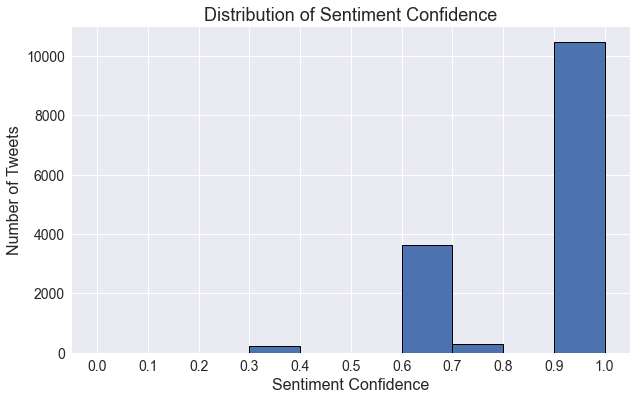

In [289]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.hist(raw_df['airline_sentiment_confidence'],
         bins=np.linspace(0, 1, 11), edgecolor='black',
         linewidth=1)
ax.set_xticks(np.linspace(0, 1, 11))
define_axis_style(ax, title="Distribution of Sentiment Confidence", x_label="Sentiment Confidence", y_label="Number of Tweets")

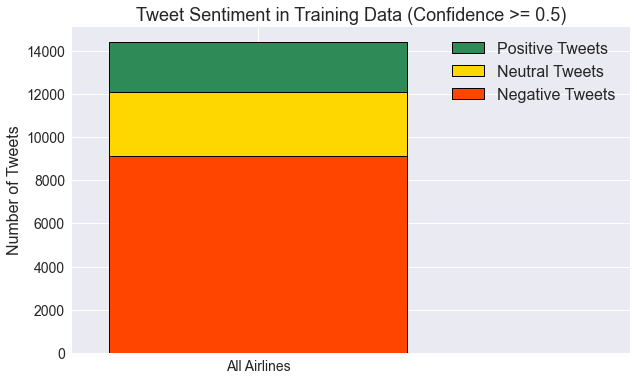

In [295]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plot_pos_neg_dist(high_conf_df, ax, title="Tweet Sentiment in Training Data (Confidence >= 0.5)")

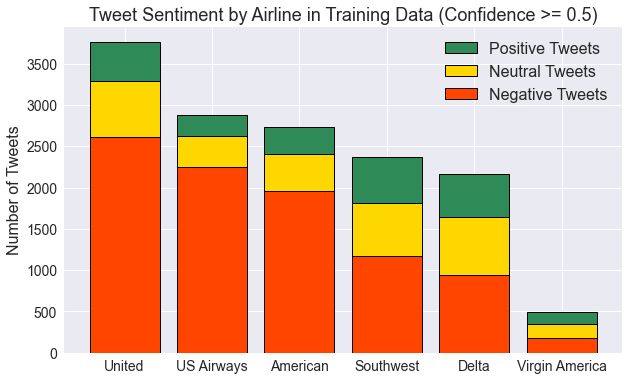

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
high_conf_df = raw_df[raw_df['airline_sentiment_confidence'] >= 0.5]
group_plot_pos_neg_dist(high_conf_df, ax, title="Tweet Sentiment by Airline in Training Data (Confidence >= 0.5)", groupby_col='airline')

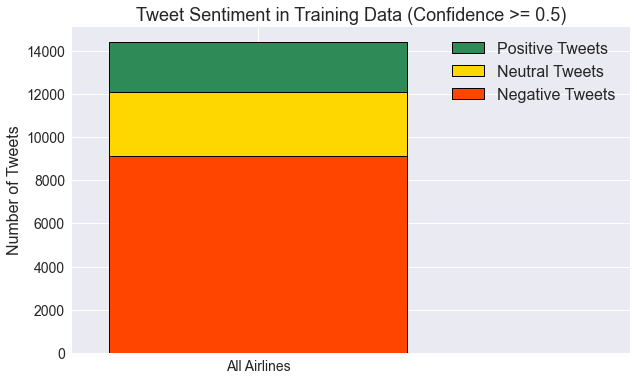

In [292]:
chars = set(list(' '.join(raw_df['text'].values)))
[char for char in chars if char.isalnum() == False]

['❄',
 '}',
 '…',
 '🎀',
 '*',
 '✅',
 '🙌',
 '🚫',
 '😄',
 '\n',
 '✔',
 '😣',
 '-',
 ';',
 '—',
 '😓',
 '🇧',
 '😅',
 '€',
 '😬',
 '💩',
 '😉',
 '🎲',
 '😵',
 '😔',
 '😠',
 '🍷',
 '😃',
 '👏',
 '͜',
 '🍸',
 '🙏',
 '❗',
 '😂',
 '😍',
 '#',
 '%',
 '{',
 '!',
 '🌏',
 ']',
 '£',
 '🐩',
 '👺',
 '✌',
 '❌',
 '😐',
 '🎵',
 '🙈',
 '😦',
 '🆖',
 '♥',
 '😷',
 '🇺',
 '\xa0',
 '🐴',
 '👉',
 '"',
 '_',
 '😮',
 '📱',
 '–',
 '😳',
 '😘',
 '☀',
 '&',
 '⛄',
 '😒',
 '🐳',
 '⤴',
 '”',
 '🎉',
 '🌟',
 '~',
 '🚪',
 ':',
 '😜',
 '💔',
 '.',
 '^',
 '🍅',
 '💕',
 '📲',
 '💘',
 "'",
 '“',
 '💤',
 '/',
 '😞',
 '😏',
 '☕',
 '😪',
 '🌞',
 '↔',
 '👀',
 '👸',
 '😢',
 '☺',
 '💜',
 '🇬',
 '💝',
 '😲',
 '😻',
 '😡',
 '👠',
 '😁',
 '💪',
 '🇸',
 '😈',
 '😑',
 '(',
 '🌴',
 '👍',
 '[',
 ')',
 '😎',
 '👊',
 '🙉',
 '✈',
 '😊',
 '👌',
 '⭐',
 '➡',
 '💯',
 '🔵',
 '⤵',
 '👋',
 '+',
 '💺',
 '️',
 '🙅',
 '‘',
 '⌚',
 '😀',
 '😱',
 '😥',
 '😭',
 '🆘',
 '💖',
 '💙',
 '💗',
 '͡',
 '😆',
 '😕',
 '😤',
 '🚶',
 '❤',
 '$',
 '👿',
 '@',
 '😩',
 '😋',
 '💁',
 '|',
 '✨',
 '🍻',
 ' ',
 '?',
 '°',
 '😖',
 '=',
 '’',
 '\u200b',
 '👎',
 ',',
 